# **Customer Segmentation**
In this code I have used K-means Clustering Model to Segment different types of Customers.

In [46]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import decomposition

from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Renaming the columns
df.rename({'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spend_score'}, axis = 1, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


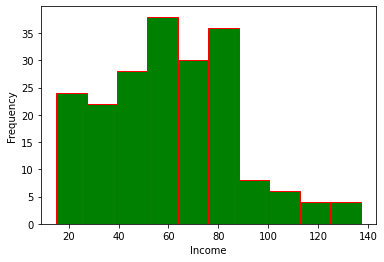

In [22]:
#Traditional Segmentation
#Plotting Graph
df.Income.plot.hist(color = 'Green', edgecolor = 'Red')
plt.xlabel('Income')
plt.show()

Creating new column 'Cluster' for values : 'Low Income', 'Moderate Income', 'High Income' which ranges from <50, 50-90, >=90 resp.

In [24]:
df['Cluster'] = np.where(df.Income >= 90, 'High earners', np.where(df.Income < 50, 'Low Income', 'Moderate Income'))
df.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


In [25]:
df.head()

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,19,15,39,Low Income
1,2,Male,21,15,81,Low Income
2,3,Female,20,16,6,Low Income
3,4,Female,23,16,77,Low Income
4,5,Female,31,17,40,Low Income


In [28]:
#Standardizing the Data
scaler = StandardScaler()
cols_to_scale = ['Age', 'Income', 'Spend_score']
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [29]:
#Calculating Distance between Customers
sel_cols = ['Income', 'Spend_score']
cust3 = df_scaled[sel_cols].head()
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [31]:
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999, 1.47571302, 0.08564307],
       [1.63050555, 0.        , 2.91186723, 0.15990848, 1.59351358],
       [1.28167999, 2.91186723, 0.        , 2.75633081, 1.32048483],
       [1.47571302, 0.15990848, 2.75633081, 0.        , 1.4369048 ],
       [0.08564307, 1.59351358, 1.32048483, 1.4369048 , 0.        ]])

In [32]:
np.sqrt((-1.739 + 1.739) ** 2 + (-0.4348 - 1.1957) ** 2)

1.6305

In [33]:
#Applying Model
cluster_cols = ['Income', 'Spend_score']
df_scaled[cluster_cols].head()

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


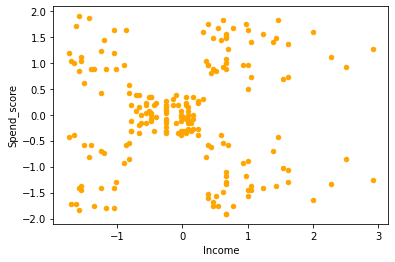

In [34]:
df_scaled.plot.scatter(x = 'Income', y = 'Spend_score', color = 'Orange')
plt.show()

In [38]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_scaled[cluster_cols])
df_scaled['Cluster'] = model.predict(df_scaled[cluster_cols])
df_scaled.head()

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2
3,4,Female,-1.137502,-1.700830,1.040418,3
4,5,Female,-0.563369,-1.662660,-0.395980,2


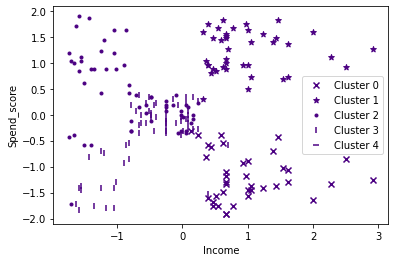

In [49]:
#Plotting on Graph
markers = ['x', '*', '.','|','_']

for clust in range(5):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker = markers[clust], color = 'Indigo', label = "Cluster " + str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

In [43]:
#Dealing with High Dimensional Data
cluster_cols = ['Age', 'Income', 'Spend_score']
df_scaled[cluster_cols].head()

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [44]:
model = KMeans(n_clusters = 4, random_state = 42)
model.fit(df_scaled[cluster_cols])

KMeans(n_clusters=4, random_state=42)

In [45]:
df_scaled['Cluster'] = model.predict(df_scaled[cluster_cols])

In [47]:
#Reducing Dimension using PCA (Principal Component Analysis) Model
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(df_scaled[cluster_cols])

df_scaled['pc1'] = pca_res[ : , 0]
df_scaled['pc2'] = pca_res[ : , 1]

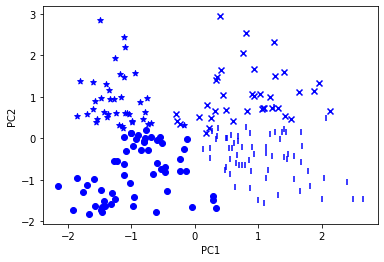

In [52]:
markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker = markers[clust], label = "Cluster " + str(clust), color = 'Blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [53]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


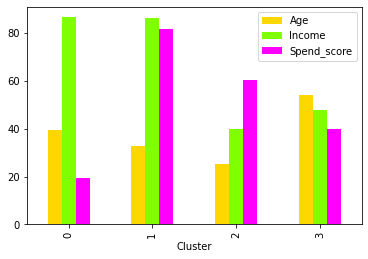

In [54]:
#Plotting on Graph
df.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean().plot.bar(color = ['gold', 'chartreuse', 'magenta'])
plt.show()

The above plot gives info that cluster 0 shows (Middle Aged, High Income, Low Spend), Cluster 1 shows (Middle Aged, High Income, High Spend), Cluster 2 shows (Young Aged, Low Income, High Spend) and Cluster 3 shows (Old Aged, Moderate Income, Moderate Spend).